In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D,GlobalAveragePooling2D, multiply, Permute, Multiply
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from keras import backend as K
import math

In [2]:
from tcn import TCN

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Activation
from tensorflow.python.keras.utils import np_utils
from sklearn.metrics import precision_score, recall_score, f1_score
from typing import Any, Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
tdf = pd.read_csv('D:/HAR/Daphnet/PreFoG/PI1/features/freq_1.csv')
tdf

,FIA_F,FIA_V,FIA_L,FIL_F,FIL_V,FIL_L,FIT_F,FIT_V,FIT_L,PA_F,...,ENt_T_L,peak_A_F,peak_A_V,peak_A_L,peak_L_F,peak_L_V,peak_L_L,peak_T_F,peak_T_V,peak_T_L
0,0.255604,0.201880,0.268956,0.215104,0.202261,0.350273,4.642603,0.198401,0.221112,2.419689e+04,...,3.082679,7.196150,9.220339,9.145974,9.834276,8.158670,15.928711,7.621073,15.156961,16.525831
1,0.221468,0.202177,0.206564,0.209339,0.198753,0.330445,0.771721,0.196140,0.259787,2.197548e+04,...,2.905290,10.513121,17.439662,11.379937,11.470662,20.662897,14.584389,7.844919,20.574660,18.132972
2,0.366882,0.197780,0.221398,0.905006,0.196448,0.541888,4.203141,0.199720,0.269303,2.692547e+04,...,3.144076,53.969047,12.429694,37.426407,308.040243,23.373333,77.596637,153.358605,33.069285,15.167472
3,0.236479,0.195585,0.190686,0.245126,0.196283,0.207387,1.918471,0.201184,0.264178,3.892167e+04,...,2.955390,176.457486,30.691349,176.293967,51.292049,10.265587,314.969608,25.099172,18.476397,27.125909
4,0.200074,0.199114,0.281368,0.388780,0.195081,0.722202,0.377567,0.205098,0.222422,1.008114e+05,...,1.468792,72.237879,16.581422,238.576756,60.824446,21.111375,442.879877,78.761257,29.209993,481.336613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17242,1.415763,0.339035,1.102846,1.784223,0.201830,0.889792,0.207931,0.251857,1.299440,1.119138e+07,...,2.810246,45386.131634,17095.811561,16040.039859,14336.587712,1797.349751,11015.804045,3087.786244,1592.027908,845.699288
17243,3.842503,0.478943,3.130317,1.800563,0.138389,1.697710,1.136340,0.219919,2.217932,1.076938e+07,...,3.043247,48918.296565,11482.090689,5489.673893,14066.072241,1459.886970,17184.582782,2437.747875,1536.685531,463.428131
17244,8.706340,0.825687,14.584485,2.404151,0.291611,1.465685,1.399177,0.304837,1.410650,5.139957e+06,...,2.880352,93786.136259,37020.259829,20864.962413,33257.429100,1463.483375,18930.165747,3090.037941,1432.703123,597.551492
17245,9.477554,2.104247,7.352573,4.585981,0.276006,2.614604,2.867446,0.204642,1.791834,6.497664e+06,...,3.107158,99281.238366,81449.772228,22377.107978,58964.213434,2399.599815,19639.529900,1878.016409,2544.788997,638.763840


In [74]:
fdf = pd.read_csv('D:/HAR/Daphnet/PreFoG/PI1/features/time_1.csv')
fdf

,0,mean_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,mean_A_V,var_A_V,std_A_V,rms_A_V,...,mean_T_V,var_T_V,std_T_V,rms_T_V,mav_T_V,mean_T_L,var_T_L,std_T_L,rms_T_L,mav_T_L
0,0,-76.265625,80.445068,8.969117,76.791215,76.265625,1031.953125,95.044678,9.749086,1031.999175,...,1015.500000,84.500000,9.192388,1015.541604,1015.500000,-75.828125,110.579834,10.515695,76.553801,75.828125
1,0,-72.515625,66.499756,8.154738,72.972705,72.515625,1033.343750,104.288086,10.212154,1033.394210,...,1012.625000,85.171875,9.228861,1012.667054,1012.625000,-79.406250,121.459961,11.020887,80.167403,79.406250
2,0,-70.859375,391.527100,19.787044,73.570226,70.859375,1033.359375,105.073975,10.250560,1033.410215,...,1013.968750,148.217773,12.174472,1014.041835,1013.968750,-78.750000,170.500000,13.057565,79.825200,78.750000
3,0,-120.234375,462.679443,21.509985,122.143294,120.234375,1026.093750,154.741211,12.439502,1026.169150,...,1013.734375,102.570068,10.127688,1013.784964,1013.734375,-68.000000,182.500000,13.509256,69.328926,68.000000
4,0,-171.031250,239.405273,15.472727,171.729711,171.031250,1014.781250,140.483398,11.852569,1014.850466,...,1017.734375,130.101318,11.406196,1017.798290,1017.734375,-50.609375,675.331787,25.987147,56.891481,50.890625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17242,1,242.250000,327142.093750,571.963367,621.149866,367.156250,1069.515625,85487.031006,292.381653,1108.760886,...,995.187500,13073.402344,114.338980,1001.734277,995.187500,115.312500,4171.496094,64.587120,132.168335,117.718750
17243,1,334.640625,300198.136475,547.903401,642.014396,431.171875,947.906250,91705.866211,302.829764,995.104077,...,1001.328125,7914.001709,88.960675,1005.272110,1001.328125,94.687500,3749.964844,61.236957,112.763857,96.750000
17244,1,373.515625,650379.812256,806.461290,888.759661,558.359375,962.968750,174659.374023,417.922689,1049.746725,...,993.843750,7477.413086,86.472036,997.598523,993.843750,91.750000,3386.000000,58.189346,108.646502,96.500000
17245,1,402.265625,902242.913818,949.864682,1031.533105,621.828125,979.484375,312390.906006,558.919409,1127.732480,...,997.781250,7689.389648,87.689165,1001.627083,997.781250,112.687500,5700.277344,75.500181,135.641992,112.968750


In [75]:
tdf.columns

Index(['FIA_F', 'FIA_V', 'FIA_L', 'FIL_F', 'FIL_V', 'FIL_L', 'FIT_F', 'FIT_V',
       'FIT_L', 'PA_F', 'PA_V', 'PA_L', 'PL_F', 'PL_V', 'PL_L', 'PT_F', 'PT_V',
       'PT_L', 'EN_A_F', 'EN_A_V', 'EN_A_L', 'EN_L_F', 'EN_L_V', 'EN_L_L',
       'EN_T_F', 'EN_T_V', 'EN_T_L', 'ENt_A_F', 'ENt_A_V', 'ENt_A_L',
       'ENt_L_F', 'ENt_L_V', 'ENt_L_L', 'ENt_T_F', 'ENt_T_V', 'ENt_T_L',
       'peak_A_F', 'peak_A_V', 'peak_A_L', 'peak_L_F', 'peak_L_V', 'peak_L_L',
       'peak_T_F', 'peak_T_V', 'peak_T_L'],
      dtype='object')

In [76]:
#tdf.drop('name', axis=1, inplace=True)

In [77]:
fdf.columns

Index(['0', 'mean_A_F', 'var_A_F', 'std_A_F', 'rms_A_F', 'mav_A_F', 'mean_A_V',
       'var_A_V', 'std_A_V', 'rms_A_V', 'mav_A_V', 'mean_A_L', 'var_A_L',
       'std_A_L', 'rms_A_L', 'mav_A_L', 'mean_L_F', 'var_L_F', 'std_L_F',
       'rms_L_F', 'mav_L_F', 'mean_L_V', 'var_L_V', 'std_L_V', 'rms_L_V',
       'mav_L_V', 'mean_L_L', 'var_L_L', 'std_L_L', 'rms_L_L', 'mav_L_L',
       'mean_T_F', 'var_T_F', 'std_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_V',
       'var_T_V', 'std_T_V', 'rms_T_V', 'mav_T_V', 'mean_T_L', 'var_T_L',
       'std_T_L', 'rms_T_L', 'mav_T_L'],
      dtype='object')

In [78]:
df = pd.concat([tdf,fdf],axis = 1)

In [79]:
#print(df['name'].value_counts())

In [80]:
df.rename(columns={'0': 'Action'}, inplace=True)
df.columns

Index(['FIA_F', 'FIA_V', 'FIA_L', 'FIL_F', 'FIL_V', 'FIL_L', 'FIT_F', 'FIT_V',
       'FIT_L', 'PA_F', 'PA_V', 'PA_L', 'PL_F', 'PL_V', 'PL_L', 'PT_F', 'PT_V',
       'PT_L', 'EN_A_F', 'EN_A_V', 'EN_A_L', 'EN_L_F', 'EN_L_V', 'EN_L_L',
       'EN_T_F', 'EN_T_V', 'EN_T_L', 'ENt_A_F', 'ENt_A_V', 'ENt_A_L',
       'ENt_L_F', 'ENt_L_V', 'ENt_L_L', 'ENt_T_F', 'ENt_T_V', 'ENt_T_L',
       'peak_A_F', 'peak_A_V', 'peak_A_L', 'peak_L_F', 'peak_L_V', 'peak_L_L',
       'peak_T_F', 'peak_T_V', 'peak_T_L', 'Action', 'mean_A_F', 'var_A_F',
       'std_A_F', 'rms_A_F', 'mav_A_F', 'mean_A_V', 'var_A_V', 'std_A_V',
       'rms_A_V', 'mav_A_V', 'mean_A_L', 'var_A_L', 'std_A_L', 'rms_A_L',
       'mav_A_L', 'mean_L_F', 'var_L_F', 'std_L_F', 'rms_L_F', 'mav_L_F',
       'mean_L_V', 'var_L_V', 'std_L_V', 'rms_L_V', 'mav_L_V', 'mean_L_L',
       'var_L_L', 'std_L_L', 'rms_L_L', 'mav_L_L', 'mean_T_F', 'var_T_F',
       'std_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_V', 'var_T_V', 'std_T_V',
       'rms_T_V', 'mav_

In [81]:
print(df['Action'].value_counts())

Action
0    15630
1     1617
Name: count, dtype: int64


In [82]:
import pandas as pd
import numpy as np


# 'Action' 칼럼을 제외한 모든 칼럼에서 0이거나 NaN이 포함된 행을 삭제
columns_to_check = df.columns.difference(['Action'])
df_filtered = df[~(df[columns_to_check] == 0).any(axis=1) & ~(df[columns_to_check].isnull()).any(axis=1)]

df_filtered

,FIA_F,FIA_V,FIA_L,FIL_F,FIL_V,FIL_L,FIT_F,FIT_V,FIT_L,PA_F,...,mean_T_V,var_T_V,std_T_V,rms_T_V,mav_T_V,mean_T_L,var_T_L,std_T_L,rms_T_L,mav_T_L
0,0.255604,0.201880,0.268956,0.215104,0.202261,0.350273,4.642603,0.198401,0.221112,2.419689e+04,...,1015.500000,84.500000,9.192388,1015.541604,1015.500000,-75.828125,110.579834,10.515695,76.553801,75.828125
1,0.221468,0.202177,0.206564,0.209339,0.198753,0.330445,0.771721,0.196140,0.259787,2.197548e+04,...,1012.625000,85.171875,9.228861,1012.667054,1012.625000,-79.406250,121.459961,11.020887,80.167403,79.406250
2,0.366882,0.197780,0.221398,0.905006,0.196448,0.541888,4.203141,0.199720,0.269303,2.692547e+04,...,1013.968750,148.217773,12.174472,1014.041835,1013.968750,-78.750000,170.500000,13.057565,79.825200,78.750000
3,0.236479,0.195585,0.190686,0.245126,0.196283,0.207387,1.918471,0.201184,0.264178,3.892167e+04,...,1013.734375,102.570068,10.127688,1013.784964,1013.734375,-68.000000,182.500000,13.509256,69.328926,68.000000
4,0.200074,0.199114,0.281368,0.388780,0.195081,0.722202,0.377567,0.205098,0.222422,1.008114e+05,...,1017.734375,130.101318,11.406196,1017.798290,1017.734375,-50.609375,675.331787,25.987147,56.891481,50.890625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17242,1.415763,0.339035,1.102846,1.784223,0.201830,0.889792,0.207931,0.251857,1.299440,1.119138e+07,...,995.187500,13073.402344,114.338980,1001.734277,995.187500,115.312500,4171.496094,64.587120,132.168335,117.718750
17243,3.842503,0.478943,3.130317,1.800563,0.138389,1.697710,1.136340,0.219919,2.217932,1.076938e+07,...,1001.328125,7914.001709,88.960675,1005.272110,1001.328125,94.687500,3749.964844,61.236957,112.763857,96.750000
17244,8.706340,0.825687,14.584485,2.404151,0.291611,1.465685,1.399177,0.304837,1.410650,5.139957e+06,...,993.843750,7477.413086,86.472036,997.598523,993.843750,91.750000,3386.000000,58.189346,108.646502,96.500000
17245,9.477554,2.104247,7.352573,4.585981,0.276006,2.614604,2.867446,0.204642,1.791834,6.497664e+06,...,997.781250,7689.389648,87.689165,1001.627083,997.781250,112.687500,5700.277344,75.500181,135.641992,112.968750


In [83]:
df['Action'].value_counts()

Action
0    15630
1     1617
Name: count, dtype: int64

In [84]:
df = df[df['Action'] != 2]

In [85]:
df['Action'].value_counts()

Action
0    15630
1     1617
Name: count, dtype: int64

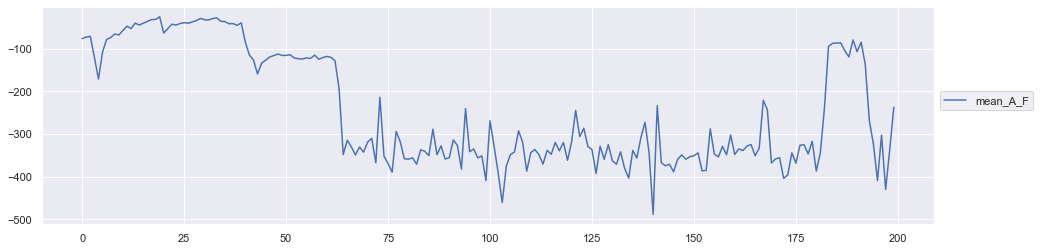

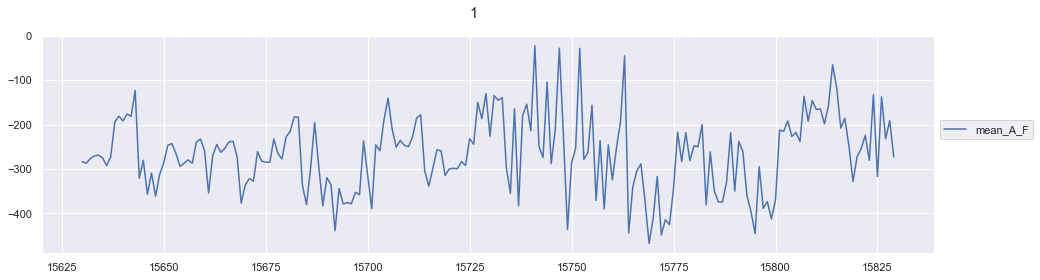

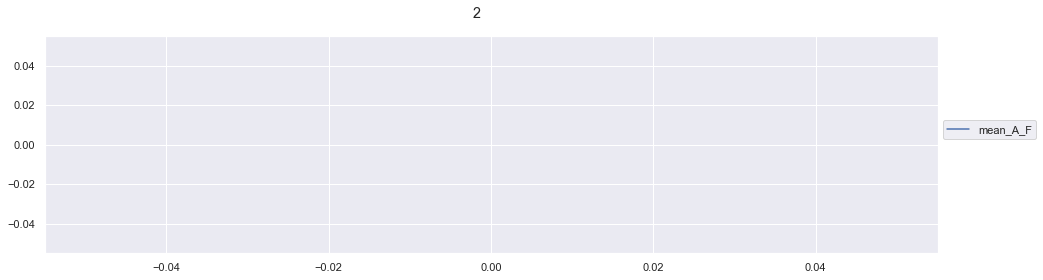

In [86]:
def plot_activity(status, df):
    data = df[df["Action"] == status][["mean_A_F"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 4), title = status)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))
        
plot_activity(0, df)
plot_activity(1, df)
plot_activity(2, df)

In [87]:
#df.to_csv('D:/HAR/Daphnet/target_sample.csv', index=False)

In [88]:
# PreFoG를 normal에 저장
#df.loc[df['status'] == 2, 'status'] = 0

# PreFoG를 FoG에 저장
df.loc[df['Action'] == 2, 'Action'] = 1

In [89]:
df['Action'].value_counts()

Action
0    15630
1     1617
Name: count, dtype: int64

In [96]:
df.dropna(inplace=True)

In [97]:
df['Action'].value_counts()

Action
0    15251
1     1617
Name: count, dtype: int64

In [98]:
Normal = df[df['Action'] == 0]  # 레이블이 'Yes'인 행만 선택
Abnormal = df[df['Action'] == 1]    # 레이블이 'No'인 행만 선택

In [99]:
X=df.drop('Action',axis=1)
X.head()
y=df['Action']
y.value_counts()

Action
0    15251
1     1617
Name: count, dtype: int64

In [101]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

AttributeError: 'NoneType' object has no attribute 'split'

In [21]:
NUM = 0

count_0 = (df['Action'] == 0).sum()
count_1 = (df['Action'] == 1).sum()

NUM = min(count_1, count_0)
NUM

1617

In [22]:
Normal = df[df['Action'] == 1].head(NUM).copy()
FoG = df[df['Action'] == 0].head(NUM).copy()

In [23]:
data = pd.DataFrame()
data = pd.concat([Normal, FoG])

In [24]:
df = data.copy()

In [25]:
df['Action'].value_counts()

Action
1    1617
0    1617
Name: count, dtype: int64

In [26]:
df

,FIA_F,FIA_V,FIA_L,FIL_F,FIL_V,FIL_L,FIT_F,FIT_V,FIT_L,PA_F,...,mean_T_V,var_T_V,std_T_V,rms_T_V,mav_T_V,mean_T_L,var_T_L,std_T_L,rms_T_L,mav_T_L
15630,2.998305,1.343343,1.970256,1.295354,0.403450,5.196786,1.596717,0.562381,3.722886,1.381417e+07,...,1025.421875,47970.493896,219.021674,1048.551628,1025.421875,109.609375,21488.425537,146.589309,183.037266,158.578125
15631,1.022114,0.625777,0.908254,0.971493,0.477921,0.250312,1.064314,0.409705,1.850218,1.204341e+07,...,988.375000,29664.109375,172.232719,1003.269281,988.375000,136.125000,28641.265625,169.237306,217.189505,177.593750
15632,3.844960,0.823117,3.038943,5.663399,0.887005,18.336227,3.085552,0.977260,1.858981,1.543930e+06,...,1024.031250,73886.686523,271.821056,1059.493600,1024.031250,5.390625,22899.519287,151.325871,151.421855,117.203125
15633,3.596953,0.790984,4.605371,5.519694,0.677903,13.501094,6.628603,1.744571,6.104813,1.541579e+06,...,1031.984375,178930.234131,423.001459,1115.312505,1031.984375,23.562500,33986.996094,184.355624,185.855286,136.343750
15634,3.589106,0.578707,1.270787,8.597176,0.209852,18.813045,15.788128,0.411418,24.901963,1.601805e+06,...,998.390625,58966.175537,242.829519,1027.496966,998.390625,23.000000,32503.062500,180.286057,181.747249,125.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,0.642313,0.205883,0.553575,2.330655,0.151844,11.991861,1.430796,0.180110,0.327979,8.760213e+06,...,998.000000,23836.375000,154.390333,1009.871465,998.000000,-141.437500,9831.058594,99.151695,172.729919,142.906250
1613,1.780347,0.316339,0.600738,1.013706,0.176849,5.323805,1.021852,0.284907,0.288954,1.032537e+07,...,1008.750000,32590.281250,180.527785,1024.776485,1008.750000,-130.906250,12184.866211,110.385081,171.234671,133.593750
1614,0.596931,0.459785,0.785460,2.352544,0.167678,4.111533,1.644589,0.353869,0.453001,1.088713e+07,...,1018.078125,24907.915771,157.822418,1030.238314,1018.078125,-120.343750,7372.725586,85.864577,147.835529,122.125000
1615,1.514359,0.901632,0.668701,2.208354,0.189293,1.639278,0.854937,0.247765,0.457815,8.760055e+06,...,997.125000,25348.421875,159.211877,1009.755756,997.125000,-138.906250,9913.834961,99.568243,170.905767,139.500000


In [27]:
df.columns

Index(['FIA_F', 'FIA_V', 'FIA_L', 'FIL_F', 'FIL_V', 'FIL_L', 'FIT_F', 'FIT_V',
       'FIT_L', 'PA_F', 'PA_V', 'PA_L', 'PL_F', 'PL_V', 'PL_L', 'PT_F', 'PT_V',
       'PT_L', 'EN_A_F', 'EN_A_V', 'EN_A_L', 'EN_L_F', 'EN_L_V', 'EN_L_L',
       'EN_T_F', 'EN_T_V', 'EN_T_L', 'ENt_A_F', 'ENt_A_V', 'ENt_A_L',
       'ENt_L_F', 'ENt_L_V', 'ENt_L_L', 'ENt_T_F', 'ENt_T_V', 'ENt_T_L',
       'peak_A_F', 'peak_A_V', 'peak_A_L', 'peak_L_F', 'peak_L_V', 'peak_L_L',
       'peak_T_F', 'peak_T_V', 'peak_T_L', 'Action', 'mean_A_F', 'var_A_F',
       'std_A_F', 'rms_A_F', 'mav_A_F', 'mean_A_V', 'var_A_V', 'std_A_V',
       'rms_A_V', 'mav_A_V', 'mean_A_L', 'var_A_L', 'std_A_L', 'rms_A_L',
       'mav_A_L', 'mean_L_F', 'var_L_F', 'std_L_F', 'rms_L_F', 'mav_L_F',
       'mean_L_V', 'var_L_V', 'std_L_V', 'rms_L_V', 'mav_L_V', 'mean_L_L',
       'var_L_L', 'std_L_L', 'rms_L_L', 'mav_L_L', 'mean_T_F', 'var_T_F',
       'std_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_V', 'var_T_V', 'std_T_V',
       'rms_T_V', 'mav_

In [28]:
#df.drop('name', axis=1, inplace=True)

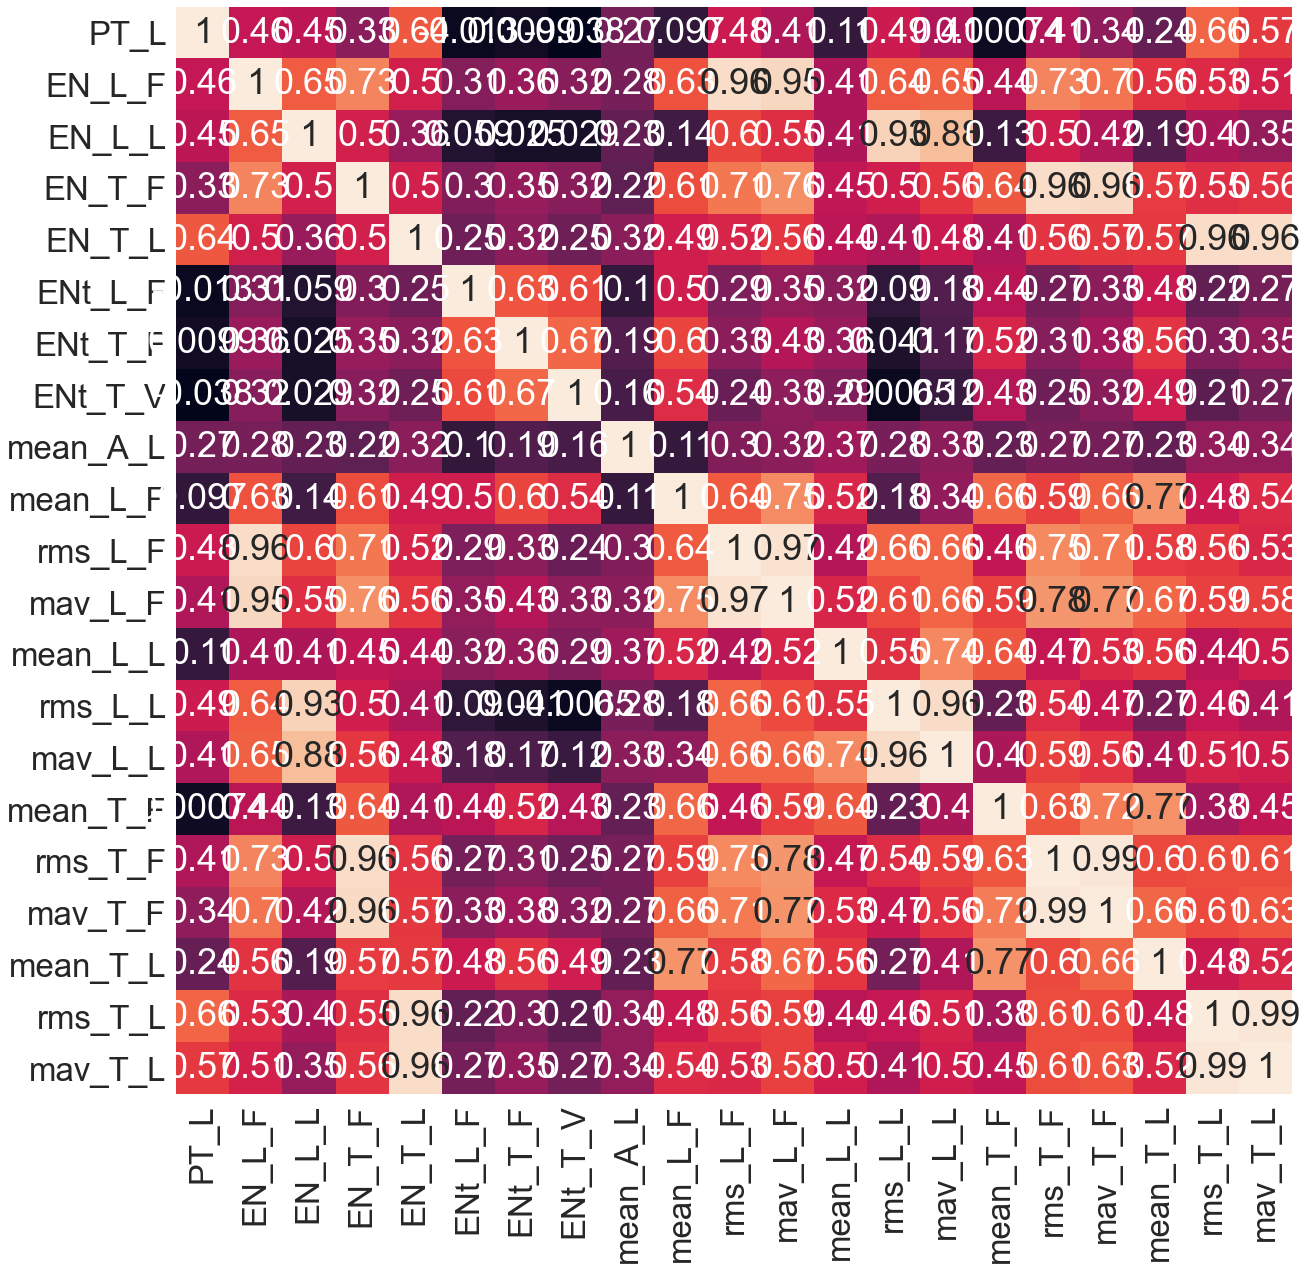

In [32]:
df_corr=df.corr()
matrix=df_corr.to_numpy()
target_row = matrix[-1, :]
indices_above_threshold = np.where(target_row >= 0.25)[0]

column_names = df.columns.tolist()
list0 = df.columns[indices_above_threshold].tolist()
df_total =df[list0]

#상관 관계 행렬
df_corr=df_total.corr()

#히트맵
plt.figure(figsize=(20,20))
sns.set(font_scale=3)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()
sns.set(font_scale=1)

In [33]:
df_total.columns

Index(['PT_L', 'EN_L_F', 'EN_L_L', 'EN_T_F', 'EN_T_L', 'ENt_L_F', 'ENt_T_F',
       'ENt_T_V', 'mean_A_L', 'mean_L_F', 'rms_L_F', 'mav_L_F', 'mean_L_L',
       'rms_L_L', 'mav_L_L', 'mean_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_L',
       'rms_T_L', 'mav_T_L'],
      dtype='object')

In [34]:
df_e = df[['PT_L', 'EN_L_F', 'EN_L_L', 'EN_T_F', 'EN_T_L', 'ENt_L_F', 'ENt_T_F',
       'ENt_T_V', 'mean_A_L', 'mean_L_F', 'rms_L_F', 'mav_L_F', 'mean_L_L',
       'rms_L_L', 'mav_L_L', 'mean_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_L',
       'rms_T_L', 'mav_T_L', 'Action']]

In [35]:
df_e['Action'].value_counts()

Action
1    1617
0    1617
Name: count, dtype: int64

In [36]:
df_e.dropna(inplace=True)
df_e['Action'].value_counts()

<ipython-input-36-cc8fc3f4d0a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e.dropna(inplace=True)


Action
1    1617
0    1617
Name: count, dtype: int64

In [37]:
y = df_e['Action']
X = df_e.drop(columns=['Action'], axis=1)

In [38]:
y

15630    1
15631    1
15632    1
15633    1
15634    1
        ..
1612     0
1613     0
1614     0
1615     0
1616     0
Name: Action, Length: 3234, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1617, 21), (1617, 21), (1617,), (1617,))

In [41]:
# 196
timestamp = 5

In [42]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [43]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, timestamp)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, timestamp)
print(X_test.shape, y_test.shape)


(1613, 5, 21) (1613,)
(1613, 5, 21) (1613,)


In [44]:
#X_train = X_train.reshape(3096, 20, 3, 1)
#X_test = X_test.reshape(3097, 20, 3, 1)

In [45]:
trainy_one_hot = to_categorical(y_train)
testy_one_hot = to_categorical(y_test)

In [46]:
verbose, batch_size=1,32 

n_timesteps,n_features=X_train.shape[1],X_train.shape[2]
n_timesteps,n_features

(5, 21)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D,GlobalAveragePooling2D, multiply, Permute, Multiply
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from keras import backend as K
import math

In [48]:
class SeqWeightedAttention(keras.layers.Layer):
    r"""Y = \text{softmax}(XW + b) X

    See: https://arxiv.org/pdf/1708.00524.pdf
    """

    def __init__(self, use_bias=True, return_attention=False, **kwargs):
        super(SeqWeightedAttention, self).__init__(**kwargs)
        self.supports_masking = True
        self.use_bias = use_bias
        self.return_attention = return_attention
        self.W, self.b = None, None

    def get_config(self):
        config = {
            'use_bias': self.use_bias,
            'return_attention': self.return_attention,
        }
        base_config = super(SeqWeightedAttention, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def build(self, input_shape):
        self.W = self.add_weight(shape=(int(input_shape[2]), 1),
                                 name='{}_W'.format(self.name),
                                 initializer=keras.initializers.get('uniform'))
        if self.use_bias:
            self.b = self.add_weight(shape=(1,),
                                     name='{}_b'.format(self.name),
                                     initializer=keras.initializers.get('zeros'))
        super(SeqWeightedAttention, self).build(input_shape)

    def call(self, x, mask=None):
        logits = K.dot(x, self.W)
        if self.use_bias:
            logits += self.b
        x_shape = K.shape(x)
        logits = K.reshape(logits, (x_shape[0], x_shape[1]))
        if mask is not None:
            mask = K.cast(mask, K.floatx())
            logits -= 10000.0 * (1.0 - mask)
        ai = K.exp(logits - K.max(logits, axis=-1, keepdims=True))
        att_weights = ai / (K.sum(ai, axis=1, keepdims=True) + K.epsilon())
        weighted_input = x * K.expand_dims(att_weights)
        result = K.sum(weighted_input, axis=1)
        if self.return_attention:
            return [result, att_weights]
        return result

    def compute_output_shape(self, input_shape):
        output_len = input_shape[2]
        if self.return_attention:
            return [(input_shape[0], output_len), (input_shape[0], input_shape[1])]
        return input_shape[0], output_len

    def compute_mask(self, _, input_mask=None):
        if self.return_attention:
            return [None, None]
        return None

    @staticmethod
    def get_custom_objects():
        return {'SeqWeightedAttention': SeqWeightedAttention}

In [49]:
def attention_3d_block2(inputs, single_attention_vector=False):
    
    # If the upper layer is LSTM, you need return_sequences=True
    # inputs.shape = (batch_size, time_steps, input_dim)
    time_steps = K.int_shape(inputs)[1]
    input_dim = K.int_shape(inputs)[2]
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    if single_attention_vector:
        a = Lambda(lambda x: K.mean(x, axis=1))(a)
        a = RepeatVector(input_dim)(a)

    a_probs = Permute((2, 1))(a)
    
    # Multiplied by the attention weight, but there is no summation, it seems to have little effect
    # If you classify tasks, you can do Flatten expansion
    # element-wise
    
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

In [50]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Model TCN + GRU

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D, Dropout
from tcn import TCN  


def build_model(head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0, n_timesteps=None, n_features=None, n_classes=None):
    inputs = Input(shape=(n_timesteps, n_features))
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(n_classes, activation="softmax")(x)
    return models.Model(inputs, outputs)

n_classes = 2 

model = build_model(
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=1,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
    n_timesteps=n_timesteps,
    n_features=n_features,
    n_classes=n_classes
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)

model.summary()

# Simplified callbacks setup
callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5, 21)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 5, 21)                89109     ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 5, 21)                0         ['multi_head_attention[0][0]']
                                                                                                  
 layer_normalization (Layer  (None, 5, 21)                42        ['dropout[0][0]']         

In [52]:
from tensorflow.keras.models import Model

inputs = Input(shape=(n_timesteps,n_features))
lstm = layers.Bidirectional(layers.GRU(64, return_sequences = True, activation = "relu"))(inputs) 

attention = attention_3d_block2(lstm) 

tcn = TCN(nb_filters=64,
        kernel_size=3,
        nb_stacks=1,
        dilations=[1, 2, 4, 8],
        use_layer_norm=True,
        dropout_rate=0.2,
        kernel_initializer='glorot_uniform')(attention)

flat = layers.Flatten()(tcn)
dens = layers.Dense(64, activation = "relu")(flat)
outputs = layers.Dense(2, activation = "sigmoid")(dens)

model2 = Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])    
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 5, 21)]              0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 5, 128)               33408     ['input_2[0][0]']             
 al)                                                                                              
                                                                                                  
 permute (Permute)           (None, 128, 5)               0         ['bidirectional[0][0]']       
                                                                                                  
 dense_2 (Dense)             (None, 128, 5)               30        ['permute[0][0]']       

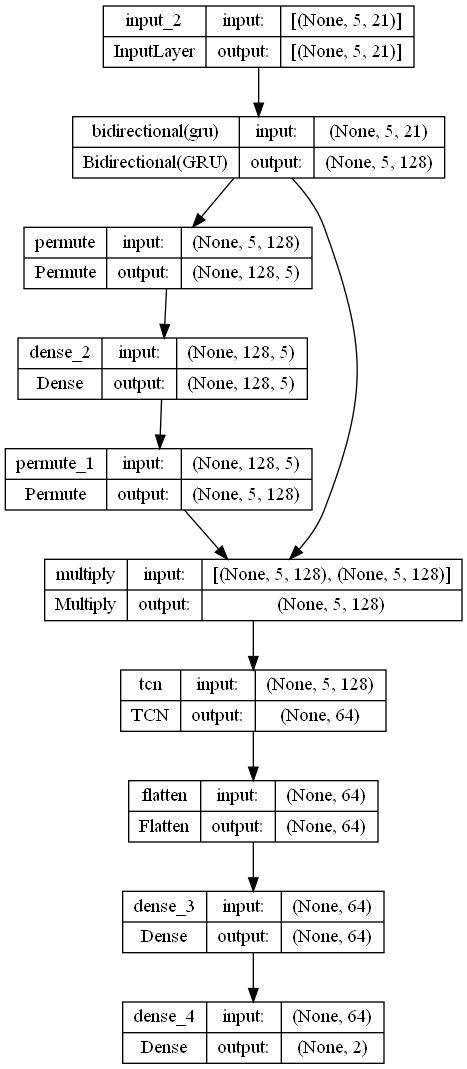

In [53]:
from tensorflow.keras.utils import plot_model

plot_model(model2, to_file='model_shapes.png', show_shapes=True)

# Model BiGRU_TCN + Transformer

In [56]:
from tensorflow.keras.layers import Input, Dense, Bidirectional, GRU, GlobalAveragePooling1D, Dropout, Concatenate
from tensorflow.keras.models import Model
import tensorflow as tf
from tcn import TCN  # TCN 라이브러리를 적절히 임포트하세요
import keras

num_transformer_blocks = 1

# 공통 입력 레이어 정의
inputs = Input(shape=(n_timesteps,n_features))
lstm = layers.Bidirectional(layers.GRU(64, return_sequences = True, activation = "relu"))(inputs) 

attention = attention_3d_block2(lstm) 

tcn = TCN(nb_filters=64,
        kernel_size=3,
        nb_stacks=1,
        dilations=[1, 2, 4, 8],
        use_layer_norm=True,
        dropout_rate=0.2,
        kernel_initializer='glorot_uniform')(attention)

flat = layers.Flatten()(tcn)

# 트랜스포머 블록 추가

x = inputs

for _ in range(num_transformer_blocks):
    x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=4, dropout=0.25)  
transformer_output = GlobalAveragePooling1D(data_format="channels_first")(x)


merged_output = Concatenate()([flat, transformer_output])  # lstm_output 대신 tcn_output을 사용하는 것으로 변경

final_output = Dense(64, activation="relu")(merged_output)
final_output = Dropout(0.2)(final_output)
outputs = Dense(2, activation="sigmoid")(final_output)

model3 = Model(inputs=inputs, outputs=outputs)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 5, 21)]              0         []                            
                                                                                                  
 multi_head_attention_3 (Mu  (None, 5, 21)                89109     ['input_4[0][0]',             
 ltiHeadAttention)                                                   'input_4[0][0]']             
                                                                                                  
 dropout_8 (Dropout)         (None, 5, 21)                0         ['multi_head_attention_3[0][0]
                                                                    ']                            
                                                                                            

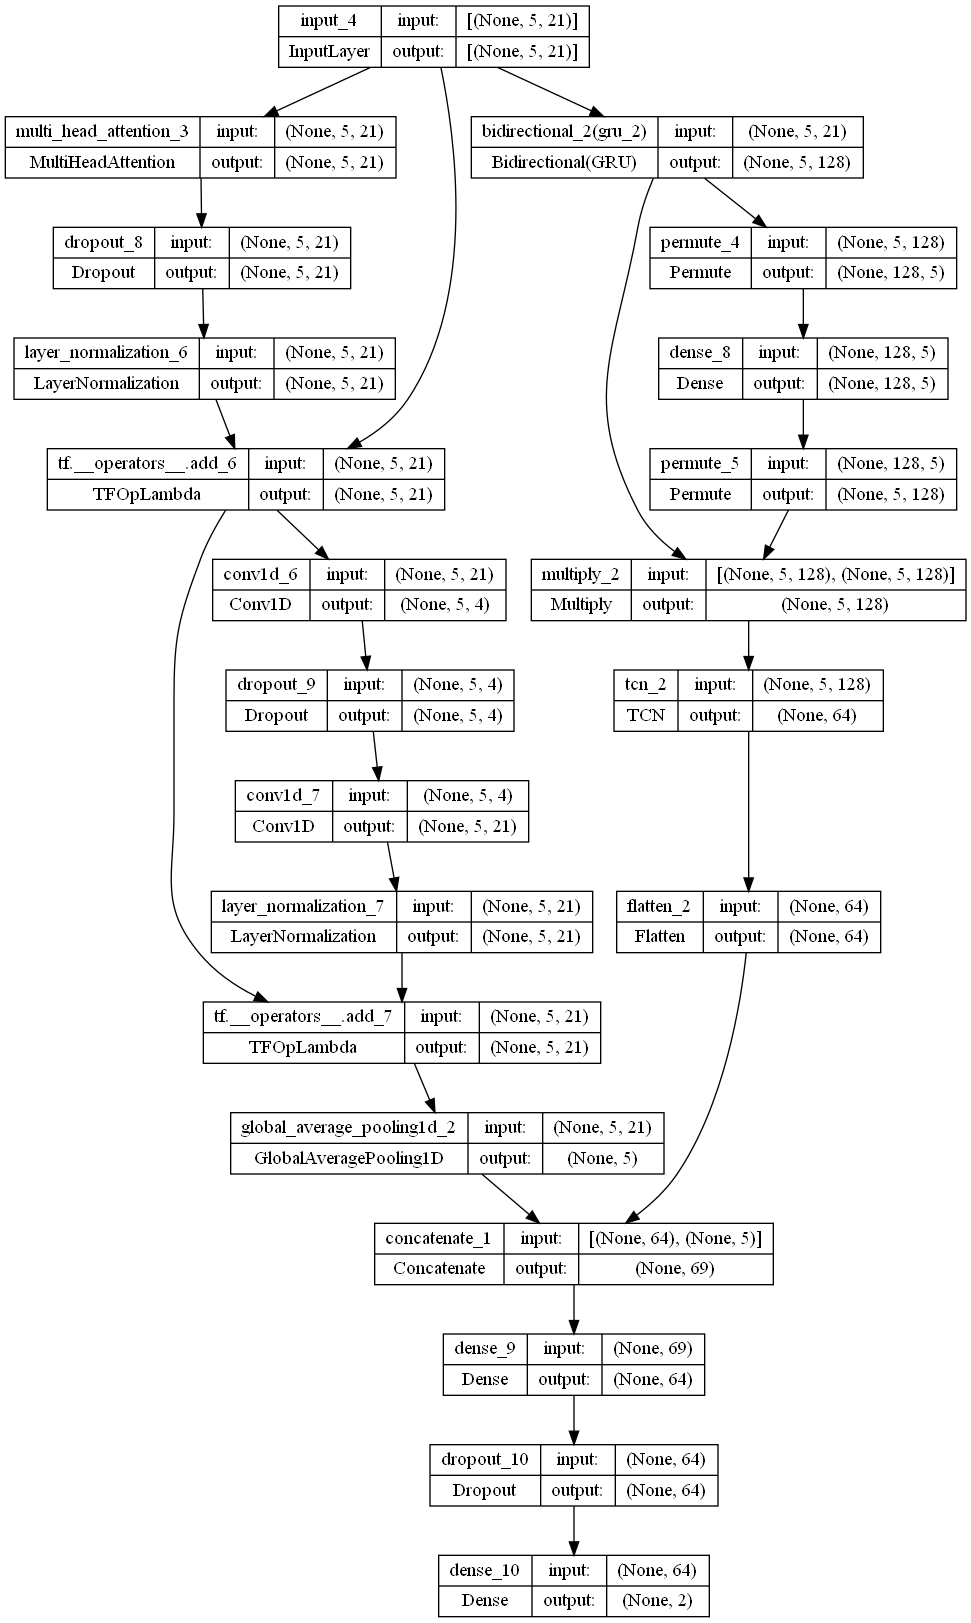

In [57]:
from tensorflow.keras.utils import plot_model

plot_model(model3, to_file='model_shapes.png', show_shapes=True)

# Model 5

In [58]:

from tensorflow.keras.models import Model

inputs = Input(shape=(n_timesteps,n_features))

tcn = TCN(nb_filters=64,
        kernel_size=3,
        nb_stacks=1,
        dilations=[1, 2, 4, 8],
        use_layer_norm=True,
        dropout_rate=0.2,
        kernel_initializer='glorot_uniform')(inputs)

lstm = layers.Bidirectional(layers.GRU(64, return_sequences = True, activation = "relu"))(inputs) 
attention = SeqWeightedAttention()(lstm)

merged = tf.keras.layers.Concatenate()([attention,tcn])

dens = layers.Dense(64, activation = "relu")(merged)
outputs = layers.Dense(2, activation = "sigmoid")(dens)

model5 = Model(inputs=inputs, outputs=outputs)
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])    
model5.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 5, 21)]              0         []                            
                                                                                                  
 bidirectional_3 (Bidirecti  (None, 5, 128)               33408     ['input_5[0][0]']             
 onal)                                                                                            
                                                                                                  
 seq_weighted_attention (Se  (None, 128)                  129       ['bidirectional_3[0][0]']     
 qWeightedAttention)                                                                              
                                                                                            

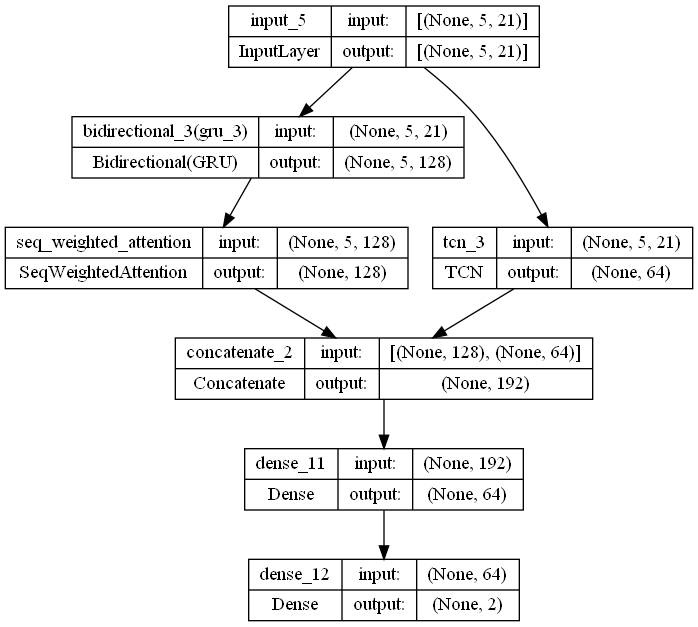

In [59]:
from tensorflow.keras.utils import plot_model

plot_model(model5, to_file='model_shapes.png', show_shapes=True)

In [60]:
history = model2.fit(X_train, trainy_one_hot, epochs = 20, batch_size = 64, validation_split = 0.1, shuffle = True)

Epoch 1/20
23/23 [==============================] - 8s 56ms/step - loss: 0.7734 - accuracy: 0.4997 - val_loss: 0.6501 - val_accuracy: 0.6049
Epoch 2/20
23/23 [==============================] - 0s 21ms/step - loss: 0.6557 - accuracy: 0.6292 - val_loss: 0.5566 - val_accuracy: 0.7099
Epoch 3/20
23/23 [==============================] - 0s 20ms/step - loss: 0.5005 - accuracy: 0.7671 - val_loss: 0.2466 - val_accuracy: 0.9198
Epoch 4/20
23/23 [==============================] - 0s 21ms/step - loss: 0.2529 - accuracy: 0.9035 - val_loss: 0.0684 - val_accuracy: 0.9877
Epoch 5/20
23/23 [==============================] - 0s 21ms/step - loss: 0.1113 - accuracy: 0.9683 - val_loss: 0.0386 - val_accuracy: 0.9877
Epoch 6/20
23/23 [==============================] - 0s 22ms/step - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.0374 - val_accuracy: 0.9877
Epoch 7/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0386 - val_accuracy: 0.9877
Epoch 8/20
23

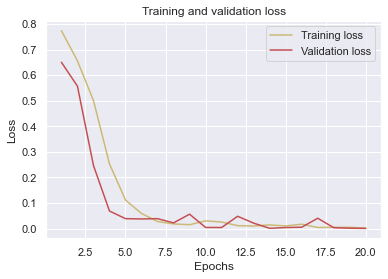

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

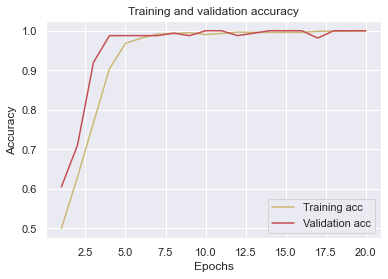

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
# 1 : Non-Fog 0 : Fog 2: PreFoG

51/51 [==============================] - 1s 5ms/step
[[779   9]
 [  4 821]]
Accuracy Score: 0.9919404835709857
F1 Score (Weighted): 0.9919398326112953
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       788
         1.0       0.99      1.00      0.99       825

    accuracy                           0.99      1613
   macro avg       0.99      0.99      0.99      1613
weighted avg       0.99      0.99      0.99      1613



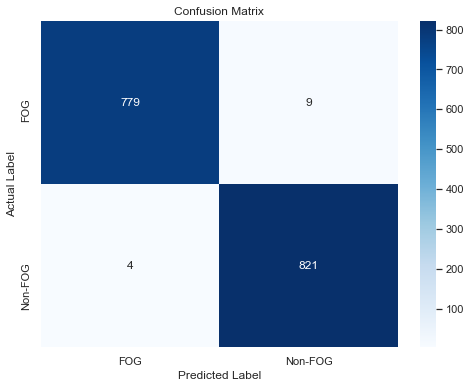

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming model.predict and X_test are defined elsewhere
predy = model2.predict(X_test)
predy = np.argmax(predy, axis=-1)
LABELS = ['FOG', 'Non-FOG']

# Calculate confusion matrix and other metrics
cm = confusion_matrix(y_test, predy)
print(cm)
print("Accuracy Score:", accuracy_score(y_test, predy))
print("F1 Score (Weighted):", f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Plotting the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size of the figure as needed
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [65]:
from sklearn.metrics import confusion_matrix

def calculate_sensitivity_specificity(y_test, predy):
    # 혼동 행렬 생성
    tn, fp, fn, tp = confusion_matrix(y_test, predy).ravel()

    # Sensitivity (민감도) 계산: TP / (TP + FN)
    sensitivity = tp / (tp + fn)

    # Specificity (특이도) 계산: TN / (TN + FP)
    specificity = tn / (tn + fp)

    return sensitivity, specificity

sensitivity, specificity = calculate_sensitivity_specificity(y_test, predy)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9951515151515151
Specificity: 0.9885786802030457


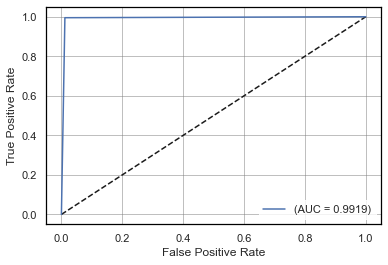

0.9918650976772804

In [66]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predy)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
ax = plt.gca()  # 현재 축 가져오기
ax.set_facecolor('white')  # 플롯 영역의 배경색을 하얗게 설정
for spine in ax.spines.values():
    spine.set_edgecolor('black')

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='(AUC = {:.4f})'.format(auc_keras))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC curve')
legend = plt.legend(loc='best', frameon=True)
legend.get_frame().set_color('white')

plt.grid(True, color='gray', linestyle='-', linewidth=0.5)  # 격자선 추가
plt.show()

auc_keras